<a href="https://colab.research.google.com/github/gaialeita/ESAME-LEITA/blob/main/esercizio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESERCIZIO FIT NFW DENSITY PROFILE - LEITA GAIA**

 **PRIMA PARTE**

In questa parte c'è l'implementazione della funzione per il calcolo di sigma:


*  R nell'intervallo [0.03, 1.0] Mpc
*  M = [10^13.5, 10^14.0, 10^15.0] Massa solare
*  c = [2, 5, 10]
*  z = 0.0


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:

# Definiamo la funzione: accetta i valori di raggio, massa, concentrazione e redshift
# Calcola il profilo di densità degli aloni
def calculate_density_profile(R, M, c, z):
    # Definiamo i valori costanti
    rho_m = 0.286 * (2.7751428946 * 10**11) * 0.7**2
    f_c = math.log(1 + c) - (c / (1 + c))
    delta_char = 200 * c**3 / (3 * f_c)
    rho_s = rho_m * delta_char * (1 + z)**3
    # Calcolo di r_s
    r_s = ((3 * M / (4 * np.pi * rho_m* ((1 + z)**3))) ** (1 / 3))
    # Calcolo della funzione f(x)
    x = R / r_s
    f_x = np.zeros_like(x)
    for i in range (len(x)):
      if(x[i]<=1):
        f_x[i]=(1-(2*np.arctanh(math.sqrt((1-x[i])/(1+x[i]))))/(math.sqrt(1-x[i]**2)))/(x**2-1)[i]
      elif(x[i]==1):
        f_x[i]=1/3
      else:
        f_x[i]=(1-(2*np.arctan(math.sqrt((x[i]-1)/(1+x[i]))))/(math.sqrt(x[i]**2-1)))/(x**2-1)[i]

    # Calcolo del profilo di densità
    Sigma = 2 * f_x * r_s * rho_s

    return Sigma

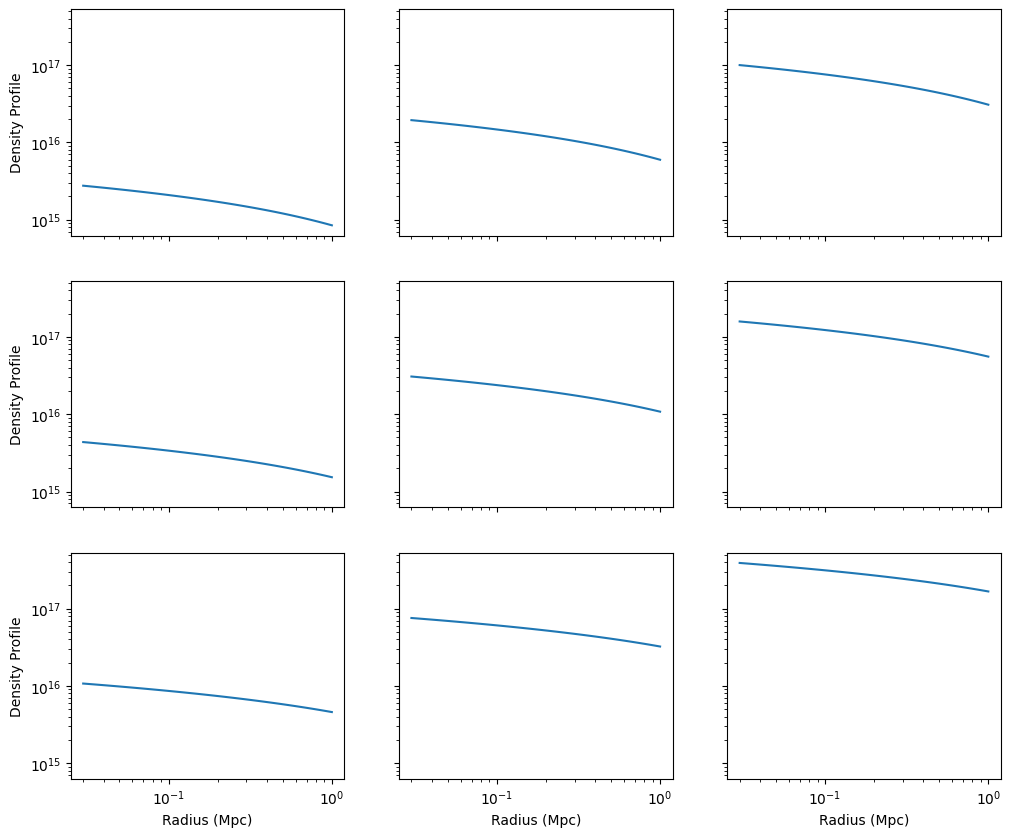

In [7]:
# Definiamo gli array di massa in unità solari e concentrazione per cui vogliamo calcolare sigma
masses = [10**13.5, 10**14.0, 10**15.0]
concentrations = [2, 5, 10]
z = 0.0  # Redshift fissato a zero

# Definiamo del raggio nell'intervallo logaritmico
R_values = np.logspace(np.log10(0.03), np.log10(1.0), base = 10)

# Ora grafichiamo tutto
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), sharex=True, sharey=True)

# Calcoliamo e visualizziamo i profili di densità
for i, M in enumerate(masses):
    for j, c in enumerate(concentrations):
        Sigma = calculate_density_profile(R_values, M, c, z)
        axes[i, j].loglog(R_values, Sigma, base=10, label=f'M={M:.1e}, c={c}')

for i in range(3):
    axes[i, 0].set_ylabel('Density Profile')
    axes[2, i].set_xlabel('Radius (Mpc)')

Ogni subplot rappresenta una combinazione di massa M e concentrazione c (3 masse x 3 concentrazioni = 9 grafici), dove viene rappresentato il profilo di densità in funzione del raggio in scala logaritmica. L'andamento del profilo di densità appare simile in ciascuno dei 9 grafici, oscillando tra valori di circa 10^15 e 10^17. La funzione appare lievemente decrescente, indicando che la densità media diminuisce gradualmente all'aumentare del raggio. Si osservi inoltre che al variare della concentrazione, a massa fissata (guardo i grafici in orizzontale), il grafico viene traslato verso l'alto. Allo stesso modo, guardando i grafici in verticale, noto che la curva tende a raddrizzarsi sempre di più.